Because of the way that we vectorize our implementations of forward and back propagation, the calculations on each step are done in a single matrix multiplication operation. This is great for performance's sake, but at scale, it represents an issue. Because most deep-learning applications tend to amass huge datasets to get piped into them, it becomes increasingly difficult to perform all of these in-memory computations when you can't, well, hold everything in memory.

### Mini Batch: A Solution

If we refer to the "do it all at once" training as *Batch Gradient Descent*, then *Mini Batch Gradient Descent* involves splitting our original dataset up into a handful of smaller datasets, then running each of them through the algorithms we've been using. In pseudocode:

``` python
for batch in batch_dataset(X, y):
    forward_prop()
    cost_fn()
    back_prop()
    update_weights()
```

It's important to note that the `batch_dataset()` has two steps:

- *Shuffling* the dataset, **maintaining matching** `X, y` **pairs**
- *Partitioning* the shuffled data into several, smaller batches

### Cost Function Over Time

With batch gradient descent, our cost function monotonically decreased over time as we continually iterated over the dataset.

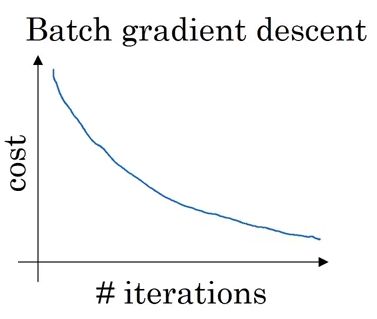

In [1]:
from IPython.display import Image

Image('images/batch_descent.png')

Alternatively, because we're taking random samples of data, some samples may yield more error than others within the same iteration, so we get this local oscillation / global decrease behavior that makes for less-neat performance investigation.

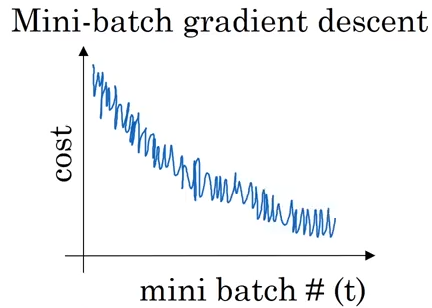

In [2]:
from IPython.display import Image

Image('images/mini_batch_descent.png')

### Determining Batch Size

So how many batches should we break our data up into? Consider a dataset with *m* training examples.

At two extremes we can have:

- *m* batches.
    - This undoes all of the performance gains that we got with vectorization
    
- 1 batch
    - This is just batch gradient descent, which, again, we can't fit into memory

And for Computational Reasons™, our batches should always be a power of 2. Typically in `64, 128, 256, 512`. Be careful to **ensure that your batch fits into memory**!

### When to Even Bother?

If you have a small training set (`m < 2000`), just use batch gradient descent.